In [1]:
## Standard Purpose
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

/Users/anoya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Preprocessing

### Import

In [2]:
df = pd.read_csv("b.csv")
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


The dataset contains 3 columns, S.No (an ID), the Review and the Rating that the customer gave.

### Adding features

We can use VADER to generate more features in the dataset. This tool is capable of identifiying the sentiment of a text. So we can categories based on a scale to classify the reviews as neutral, positive or negative.

In [3]:
## Get sentiment
analyzer = SentimentIntensityAnalyzer()

def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

def get_sentiment(score):
    if score >= 0.5:
        return "Positive"
    elif score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

Apply the functions

In [4]:
df["Sentiment_Score"] = df["Review"].astype("str").apply(compound_score)
df["Sentiment"] = df["Sentiment_Score"].apply(get_sentiment)

### Check Missing Values

No missing data

In [5]:
df.isna().sum()

S.No.              0
Review             0
Rating             0
Sentiment_Score    0
Sentiment          0
dtype: int64

### Distribution

In [6]:
df.Sentiment.value_counts()

Sentiment
Positive    18320
Negative     1093
Neutral      1077
Name: count, dtype: int64

/var/folders/ts/7ztr_k8d2xq85mf55mh3hk9w0000gn/T/ipykernel_14677/3003983532.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="pastel")


<Axes: xlabel='Sentiment', ylabel='count'>

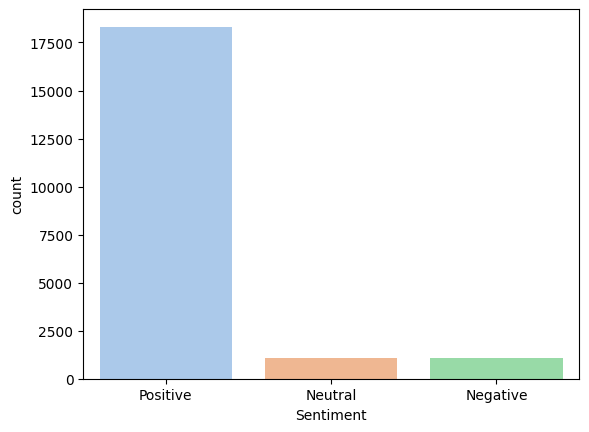

In [7]:
sns.countplot(data=df, x="Sentiment", palette="pastel")

## Visualization

### Bar Graph

In [13]:
# Preparing data for visualization 
Viz_1 = df[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')
print(Viz_1)
# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

    Rating Sentiment  counts
0        5  Positive    8970
1        4  Positive    5916
2        3  Positive    1895
3        2  Positive    1119
4        1  Negative     666
5        1  Positive     420
6        2   Neutral     355
7        1   Neutral     335
8        2  Negative     319
9        3   Neutral     212
10       4   Neutral     103
11       3  Negative      76
12       5   Neutral      72
13       4  Negative      20
14       5  Negative      12


### Pie Chart

In [15]:
Viz_2 = df['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')
print(Viz_2)
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

   Rating  counts
0       5    9054
1       4    6039
2       3    2183
3       2    1793
4       1    1421


### Joint plot of the basis of Rating and Sentiment Score 

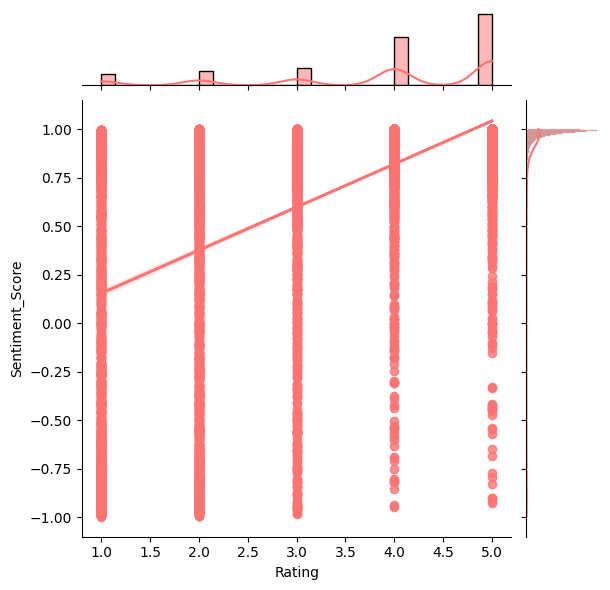

In [18]:
jp = sns.jointplot(data = df, x = 'Rating', y = 'Sentiment_Score', kind = "reg", color = '#ff7373')

### Violin Plot

In [20]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=df['Rating'][df['Rating'] == rating],
                            y=df['Sentiment_Score'][df['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

### Worcloud for different sentiments